<a href="https://colab.research.google.com/github/MariaCelinaJ/Ci-ncia-de-dados-iniciante/blob/main/Titanic_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic - Regressão Logística em R**

Resolução de alguns problemas de Análise de Regressão Simples utilizando o R.

https://colab.research.google.com/drive/1Aidp6jJ5wadGWMt1OpjsTEKMVKzB21Z0?usp=sharing

##Problema 1
Vamos fazer um exercício de Regressão Logística, trabalhando com a base de dados do Titanic.

Utilizaremos os arquivos preparados para esta atividade. Embora os nomes sejam os mesmos, estes arquivos podem ser diferentes (em conteúdo) daqueles encontrados no site Kaggle.

A base de dados (treinamento) é uma coleção de dados sobre alguns dos passageiros (891 ou 892) e o objetivo é prever a sobrevivência (1 se o passageiro sobreviveu ou 0 caso contrário), baseado em algumas características tais como classe de serviço, sexo, idade, etc. A base de dados de teste tem a mesma estrutura da base de treinamento, mas a variável Survived não contém nenhum valor (ou não está presente)

Depois de construir o modelo, vamos aplicá-lo a este conjunto de dados de teste e prever o valor da variável Survived.

Como podemos ver, utilizaremos tanto variáveis categóricas como contínuas.

Quando trabalhamos com uma base de dados real, precisamos levar em conta o fato de podermos ter dados faltantes ou corrompidos, e, portanto, precisamos preparar a base de dados para nossa análise.

As tarefas a serem realizadas são:


Fazer a preparação dos dados para serem utilizados na análise, considerando que serão utilizadas apenas as variáveis Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

*   Do conjunto de dados original, selecionar um subconjunto apenas com as variáveis indicadas acima e a variável PassengerId.
*   Atribuir um valor para os NAs na variável Age. Utilizando algum critério razoável, por exemplo, o valor médio.
*   Remover as linhas onde ainda estiverem faltando dados, depois de atribuir o valor para os NAs de Age. Poucas linhas estarão ainda com dados faltantes.




In [ ]:
#Instalando pacotes
install.packages("ggpubr")
install.packages("ggplot2")
install.packages("plm")
install.packages("dplyr")
install.packages("data.table")
install.packages("visdat")
library(data.table)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(stringr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘zoo’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    

In [ ]:
install.packages("ggcorrplot")
install.packages("corrplot")
install.packages("ggcorrpRColorBrewerlot")
install.packages("mice")
install.packages("ModelMetrics")
install.packages("NbClust")
install.packages("randomForest")
install.packages("xgboost")
library(ggcorrplot)
library(corrplot)
library(RColorBrewer)
library(mice)
library(ModelMetrics)
library(NbClust)
library(randomForest)
library(xgboost)
library(Matrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggcorrpRColorBrewerlot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92

In [ ]:
train <- read.csv(file="https://raw.githubusercontent.com/MariaCelinaJ/Arquivos-Coleta-de-Dados/main/titanic_dw_train.csv", header=TRUE, sep=",",stringsAsFactors = FALSE,na.strings=c("NA",""))
test <- read.csv(file="https://raw.githubusercontent.com/MariaCelinaJ/Arquivos-Coleta-de-Dados/main/titanic_dw_test.csv", header=TRUE, sep=",",stringsAsFactors = FALSE,na.strings=c("NA",""))

In [ ]:
set.seed(123)

In [ ]:
test$Survived <- 0
titanic_avaliar <- rbind(train,test)
str(titanic_avaliar)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  2 3 4 5 6 10 11 12 13 15 ...
 $ Survived   : num  0 1 0 1 0 0 1 0 0 1 ...
 $ Pclass     : int  3 1 2 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Johansson, Mr. Nils" "Minahan, Mrs. William Edward (Lillian E Thorpe)" "Hocking, Mr. Samuel James Metcalfe" "Chibnall, Mrs. (Edith Martha Bowerman)" ...
 $ Sex        : chr  "male" "female" "male" "female" ...
 $ Age        : num  29 37 36 NA 30 21 53 20 26 62 ...
 $ SibSp      : int  0 1 0 0 0 1 1 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 0 1 0 0 0 ...
 $ Ticket     : chr  "347467" "19928" "242963" "113505" ...
 $ Fare       : num  7.85 90 13 55 8.05 ...
 $ Cabin      : chr  NA "C78" NA "E33" ...
 $ Embarked   : chr  "S" "Q" "S" "S" ...


In [ ]:
summary(titanic_avaliar)

  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.2567   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                                                                   
     Sex                 Age              SibSp            Parch      
 Length:1309        Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median :28.0000   Median :0.0000   Median :0.000  
                    Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
                    3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
                    Max.   :80

In [ ]:
#Verificando Dados Faltantes
sapply(titanic_avaliar,function(df){100*sum(is.na(df==TRUE)/length(df))})

PassengerId    Survived      Pclass        Name         Sex         Age 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 20.09167303 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
 0.00000000  0.00000000  0.00000000  0.07639419 77.46371276  0.15278839

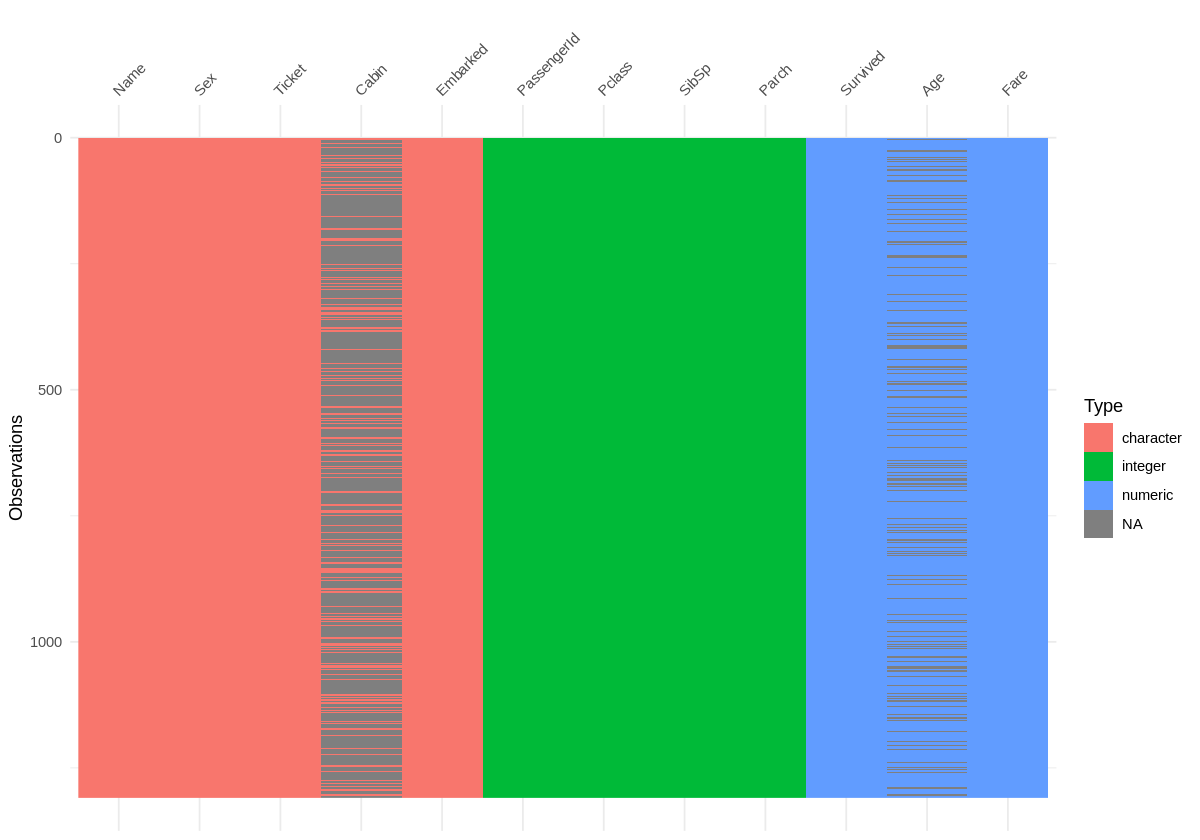

In [ ]:
#Configuração área de plotagem
options(repr.plot.width = 10,repr.plot.height = 7)
visdat::vis_dat(titanic_avaliar)

In [ ]:
#Variáveis com NAs são Age, Cabin e Embarked
#Usaremos a variável Name no conjunto de dados para estimar a idade
titanic_avaliar$Name = as.character(titanic_avaliar$Name)

table_words = table(unlist(strsplit(titanic_avaliar$Name, "\\s+")))
sort(table_words [grep('\\.',names(table_words))],decreasing=TRUE)


      Mr.     Miss.      Mrs.   Master.       Dr.      Rev.      Col.    Major. 
      757       260       197        61         8         8         4         2 
    Mlle.       Ms.     Capt. Countess.      Don.     Dona. Jonkheer.        L. 
        2         2         1         1         1         1         1         1 
    Lady.      Mme.      Sir. 
        1         1         1 

In [ ]:
d=cbind(titanic_avaliar$Age, str_match(titanic_avaliar$Name, "[a-zA-Z]+\\.")) 

table(d[is.na(d[,1]),2]) 


    Dr. Master.   Miss.     Mr.    Mrs.     Ms. 
      1       8      50     176      27       1 

In [ ]:
# Média de cd grupo de acordo com a abreviação
mean.mr=mean(titanic_avaliar$Age[grepl(" Mr\\.", titanic_avaliar$Name) & !is.na(titanic_avaliar$Age)])
mean.mrs=mean(titanic_avaliar$Age[grepl(" Mrs\\.", titanic_avaliar$Name) & !is.na(titanic_avaliar$Age)])
mean.dr=mean(titanic_avaliar$Age[grepl(" Dr\\.", titanic_avaliar$Name) & !is.na(titanic_avaliar$Age)])
mean.miss=mean(titanic_avaliar$Age[grepl(" Miss\\.", titanic_avaliar$Name) & !is.na(titanic_avaliar$Age)])
mean.master=mean(titanic_avaliar$Age[grepl(" Master\\.", titanic_avaliar$Name) & !is.na(titanic_avaliar$Age)])

# Atribui valor as NAs
titanic_avaliar$Age[grepl(" Mr\\.", titanic_avaliar$Name) & is.na(titanic_avaliar$Age)]=mean.mr
titanic_avaliar$Age[grepl(" Mrs\\.", titanic_avaliar$Name) & is.na(titanic_avaliar$Age)]=mean.mrs
titanic_avaliar$Age[grepl(" Dr\\.", titanic_avaliar$Name) & is.na(titanic_avaliar$Age)]=mean.dr
titanic_avaliar$Age[grepl(" Miss\\.", titanic_avaliar$Name) & is.na(titanic_avaliar$Age)]=mean.miss
titanic_avaliar$Age[grepl(" Master\\.", titanic_avaliar$Name) & is.na(titanic_avaliar$Age)]=mean.master

#Verificando Dados Faltantes
NAs <- sapply(titanic_avaliar,function(df){100*sum(is.na(df==TRUE)/length(df))})
NAs["Age"]

Age 
  0

In [ ]:
titanic_avaliar$Age[which(is.na(titanic_avaliar$Age))]= 50
NAs["Age"]

Age 
  0

In [ ]:
#Verificando Dados Faltantes
sapply(titanic_avaliar,function(df){100*sum(is.na(df==TRUE)/length(df))})

PassengerId    Survived      Pclass        Name         Sex         Age 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000  0.00000000 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
 0.00000000  0.00000000  0.00000000  0.07639419 77.46371276  0.15278839

In [ ]:
table(titanic_avaliar$Embarked, useNA="always")


   C    Q    S <NA> 
 270  123  914    2 

In [ ]:
titanic_avaliar$Embarked[which(is.na(titanic_avaliar$Embarked))]= 'S'
table(titanic_avaliar$Embarked, useNA="always")


   C    Q    S <NA> 
 270  123  916    0 

In [ ]:
titanic_avaliar$Fare[which(is.na(titanic_avaliar$Fare))]= 0
table(titanic_avaliar$Fare, useNA="always")


       0   3.1708   4.0125        5   6.2375   6.4375     6.45   6.4958 
      18        1        1        1        1        3        1        3 
    6.75   6.8583     6.95    6.975        7   7.0458     7.05   7.0542 
       2        1        2        2        2        1        9        2 
   7.125   7.1417    7.225   7.2292     7.25   7.2833   7.3125   7.4958 
       4        1       21       24       18        1        1        3 
  7.5208     7.55    7.575   7.5792   7.6292     7.65   7.7208    7.725 
       1        8        1        1        2        6        1        2 
  7.7292   7.7333   7.7375   7.7417     7.75    7.775   7.7792   7.7875 
       1        7        2        1       55       26        1        1 
  7.7958      7.8   7.8208   7.8292     7.85   7.8542    7.875   7.8792 
      10        1        1        3        1       21        1       10 
  7.8875   7.8958    7.925   8.0292     8.05   8.1125   8.1375   8.1583 
       2       49       23        1       60      

In [ ]:
#definindo os vetores para as.factor
#titanic_avaliar$Survived = as.factor(titanic_avaliar$Survived)
#titanic_avaliar$Pclass = as.factor(titanic_avaliar$Pclass)
#titanic_avaliar$Sex = as.factor(titanic_avaliar$Sex)
#titanic_avaliar$Age = as.factor(titanic_avaliar$Age)
#titanic_avaliar$SibSp = as.factor(titanic_avaliar$SibSp)
#titanic_avaliar$Parch = as.factor(titanic_avaliar$Parch)
#titanic_avaliar$Fare = as.factor(titanic_avaliar$Fare)
#titanic_avaliar$Embarked = as.factor(titanic_avaliar$Embarked) 
#titanic_avaliar$PassengerId = as.factor(titanic_avaliar$PassengerId)

#attach(titanic_avaliar) ;
#str(titanic_avaliar)


In [ ]:
#Data frame com as variáveis solicitdas
titanic_avaliar1 <- titanic_avaliar[,c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',"PassengerId")]


In [ ]:
#Verificando Dados Faltantes
sapply(titanic_avaliar1,function(df){100*sum(is.na(df==TRUE)/length(df))})

Survived      Pclass         Sex         Age       SibSp       Parch 
          0           0           0           0           0           0 
       Fare    Embarked PassengerId 
          0           0           0

In [ ]:
head(titanic_avaliar1)
tail(titanic_avaliar1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
,<dbl>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>
1,0,3,male,29.00000,0,0,7.8542,S,2
2,1,1,female,37.00000,1,0,90.0000,Q,3
3,0,2,male,36.00000,0,0,13.0000,S,4
4,1,1,female,36.99412,0,1,55.0000,S,5
5,0,3,male,30.00000,0,0,8.0500,S,6
6,0,3,male,21.00000,1,0,6.4958,S,10


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
,<dbl>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>
1304,0,2,male,28.00000,0,0,10.500,S,1302
1305,0,1,male,32.25215,0,0,35.500,S,1305
1306,0,3,male,28.00000,0,0,9.500,S,1306
1307,0,3,male,21.00000,0,0,7.750,Q,1307
1308,0,2,male,39.00000,0,0,26.000,S,1308
1309,0,3,male,16.00000,0,0,7.775,S,1309


Criar um modelo  onde Survived será uma função das demais variáveis.

In [ ]:
as.data.frame(table(titanic_avaliar1$Survived))

Var1,Freq
<fct>,<int>
0,973
1,336


336 sobreviventes, 973 não conseguiram sobreviver.

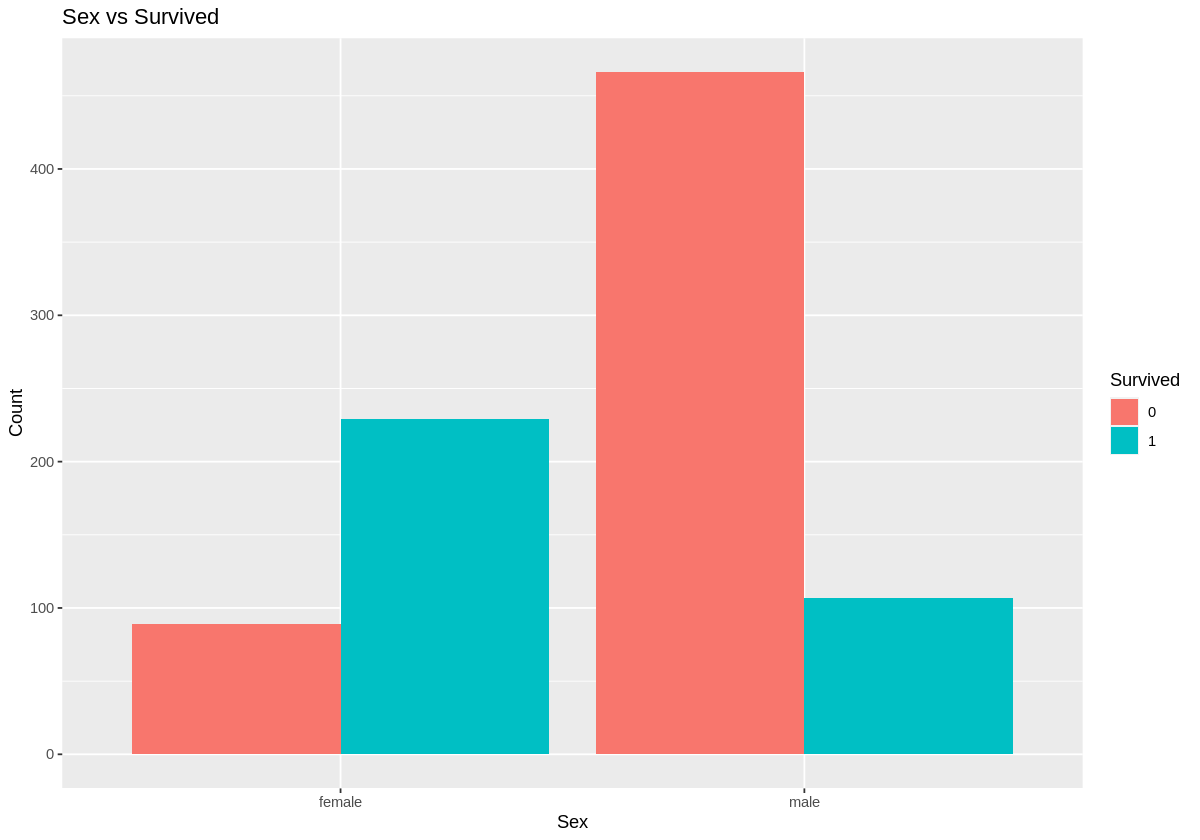

In [ ]:
#Configuração área de plotagem
options(repr.plot.width = 10,repr.plot.height = 7)
#Sex vs Survived
ggplot(titanic_avaliar1[1:891,], aes(Sex, fill = factor(Survived))) + 
  geom_bar(stat = "count", position = 'dodge')+
  xlab("Sex") +
  ylab("Count") +
  scale_fill_discrete(name = "Survived") + 
  ggtitle("Sex vs Survived")

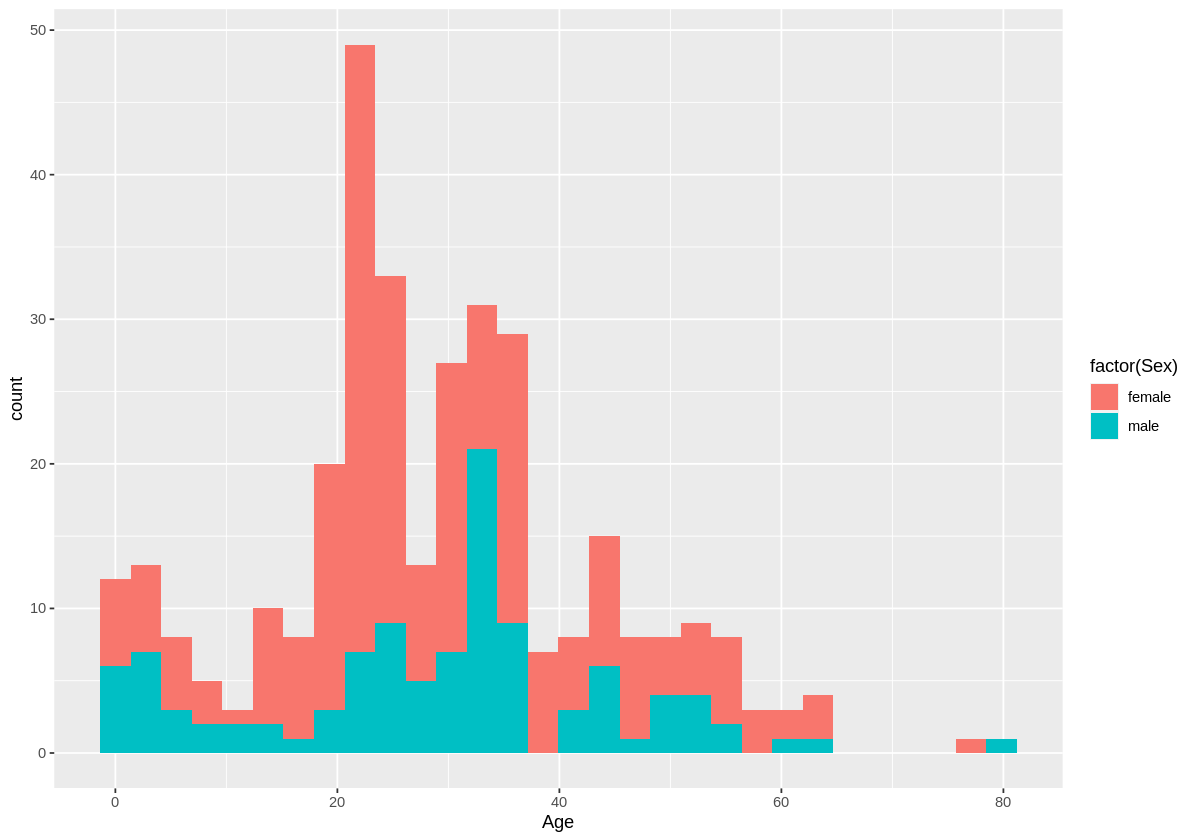

In [ ]:
# Age vs Sex
#titanic_avaliar1$Survived <- as.numeric(titanic_avaliar1$Survived)
survived <- titanic_avaliar1[titanic_avaliar1$Survived == 1, ]

#titanic_avaliar1$Sex <- as.numeric(titanic_avaliar1$Sex)
#titanic_avaliar1$Age <- as.numeric(titanic_avaliar1$Age)

ggplot(survived, aes(x = Age, fill = factor(Sex))) +
  geom_histogram(bins=30)

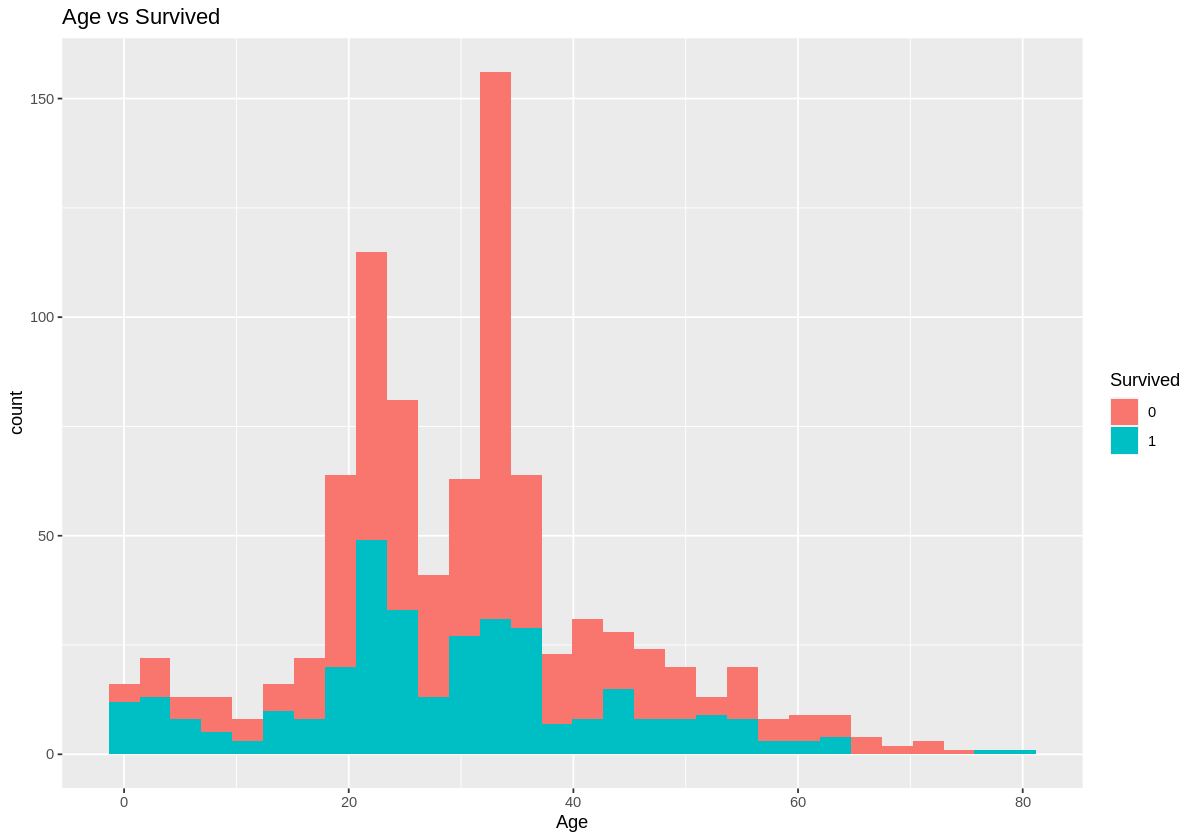

In [ ]:
# Age vs Survived
ggplot(titanic_avaliar1[1:891,], aes(Age, fill = factor(Survived))) + 
  geom_histogram(bins=30) + 
  xlab("Age") +
  scale_fill_discrete(name = "Survived") + 
  ggtitle("Age vs Survived")

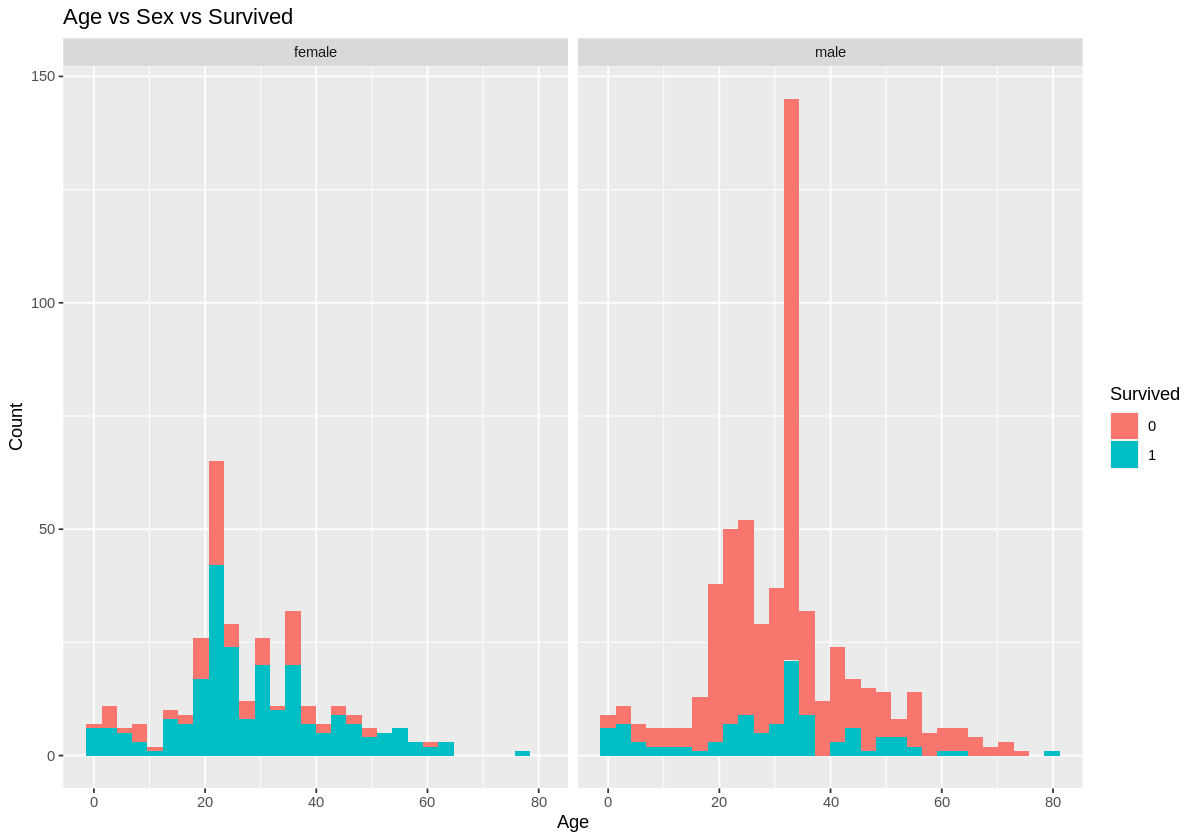

In [ ]:
#Sex vs Survived vs Age 
ggplot(titanic_avaliar1[1:891,], aes(Age, fill = factor(Survived))) + 
  geom_histogram(bins=30) + 
  xlab("Age") +
  ylab("Count") +
  facet_grid(.~Sex)+
  scale_fill_discrete(name = "Survived") + 
  ggtitle("Age vs Sex vs Survived")

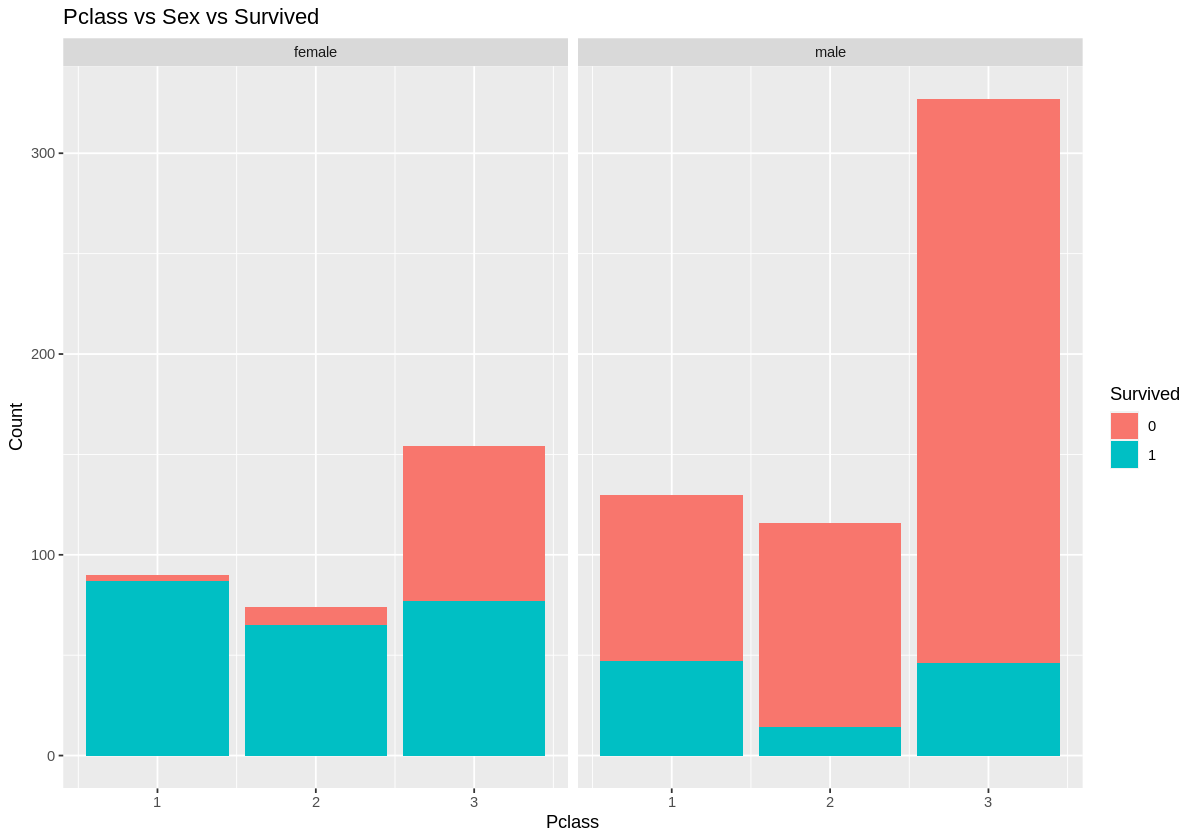

In [ ]:
# Pclass vs Survived
ggplot(titanic_avaliar1[1:891,], aes(Pclass, fill = factor(Survived))) + 
  geom_bar(stat = "count")+
  xlab("Pclass") +
  facet_grid(.~Sex)+
  ylab("Count") +
  scale_fill_discrete(name = "Survived") + 
  ggtitle("Pclass vs Sex vs Survived")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


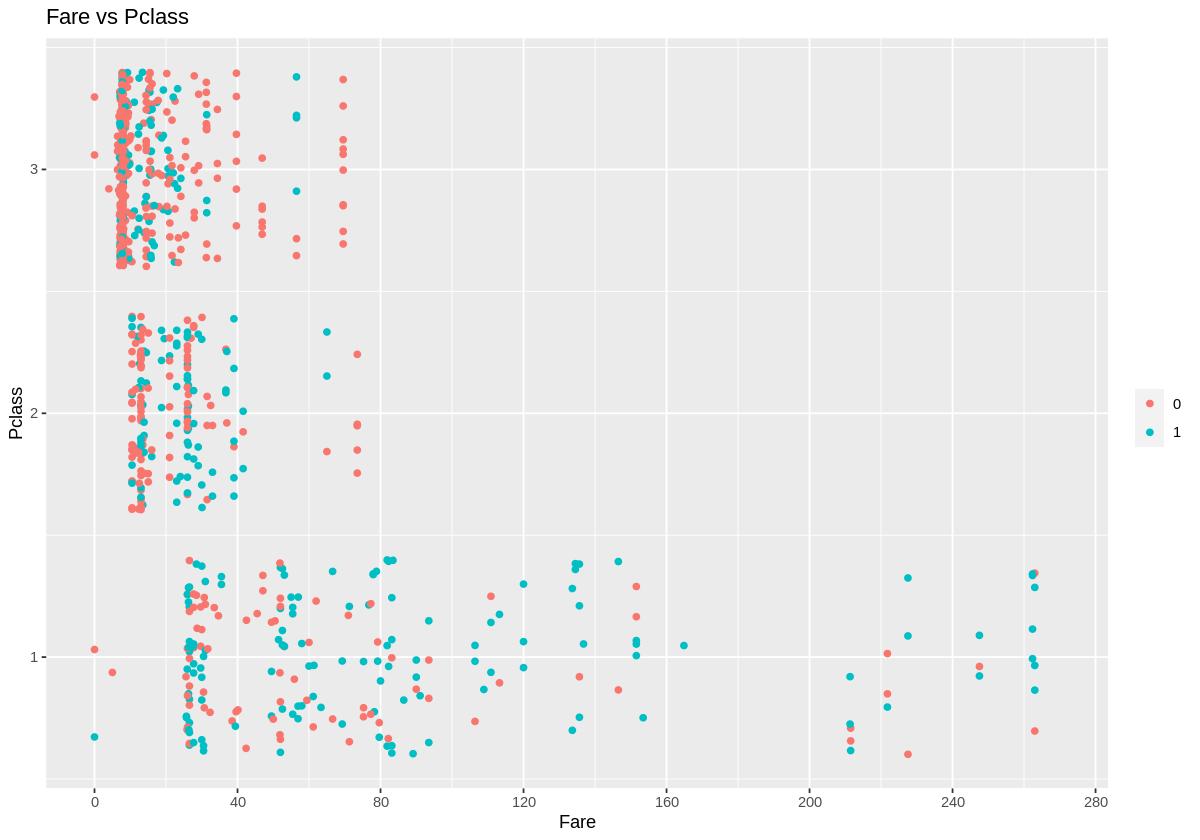

In [ ]:
#Fare vs Pclass
#titanic_avaliar1$Fare <- as.numeric(titanic_avaliar1$Fare)
#titanic_avaliar1$Pclass <- as.numeric(titanic_avaliar1$Pclass)
ggplot(titanic_avaliar1[1:891,], aes(x = Fare, y = Pclass)) + 
  geom_jitter(aes(colour = factor(Survived))) +
  theme(legend.title = element_blank())+
  labs(x = "Age", y = "Pclass", title = "Fare vs Pclass")+
  scale_fill_discrete(name = "Survived") + 
  scale_x_continuous(name="Fare", limits=c(0, 270), breaks=c(0, 40, 80, 120, 160, 200, 240, 280))

[1] "S" "S"

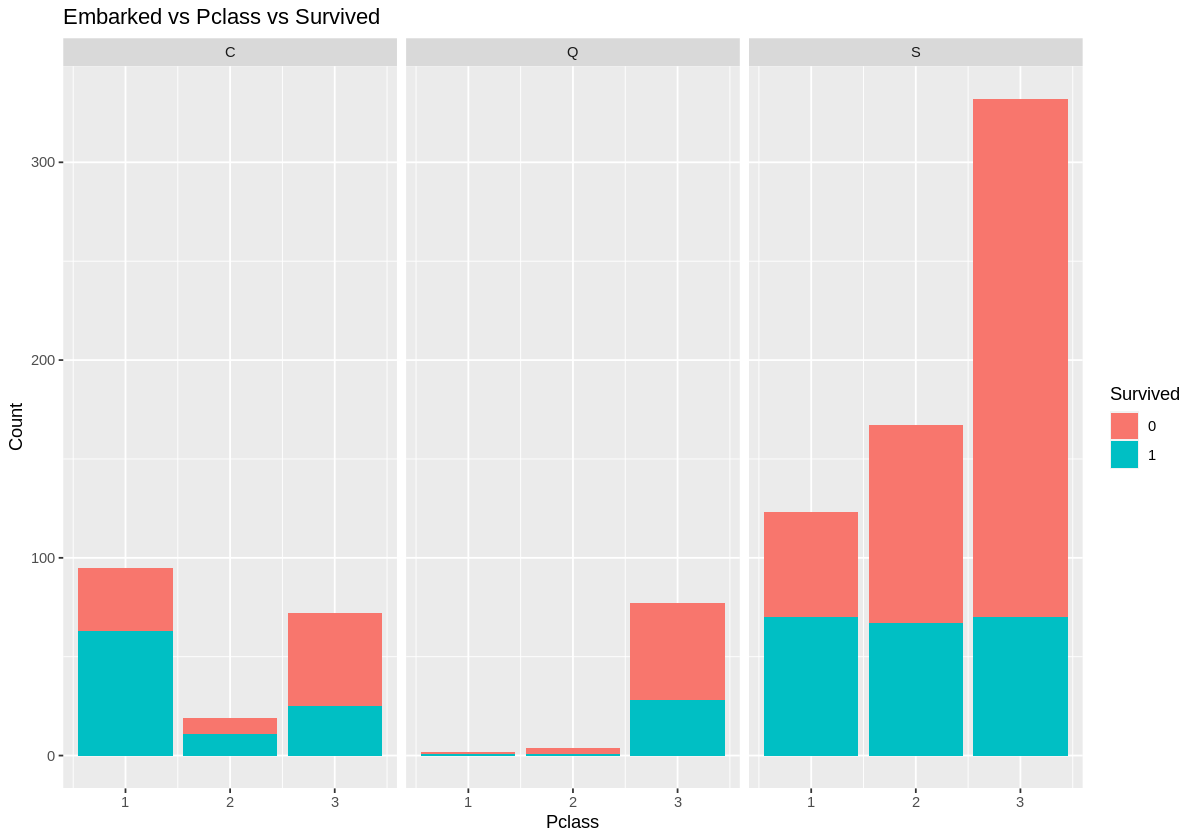

In [ ]:
#Embarked vs Pclass vs Survived
titanic_avaliar1[c(62, 830), 'Embarked']

titanic_avaliar1$Embarked[c(62, 830)] <- 'S'

ggplot(titanic_avaliar1[1:891,], aes(Pclass, fill = factor(Survived))) + 
  geom_bar(stat = "count")+
  xlab("Pclass") +
  ylab("Count") +
  facet_wrap(~Embarked) + 
  scale_fill_discrete(name = "Survived") + 
  ggtitle("Embarked vs Pclass vs Survived")

In [ ]:
#Vericando quantidade de pessoas por família
titanic_avaliar1$tam_familia <- as.numeric(titanic_avaliar1$SibSp) + as.numeric(titanic_avaliar1$Parch) + 1

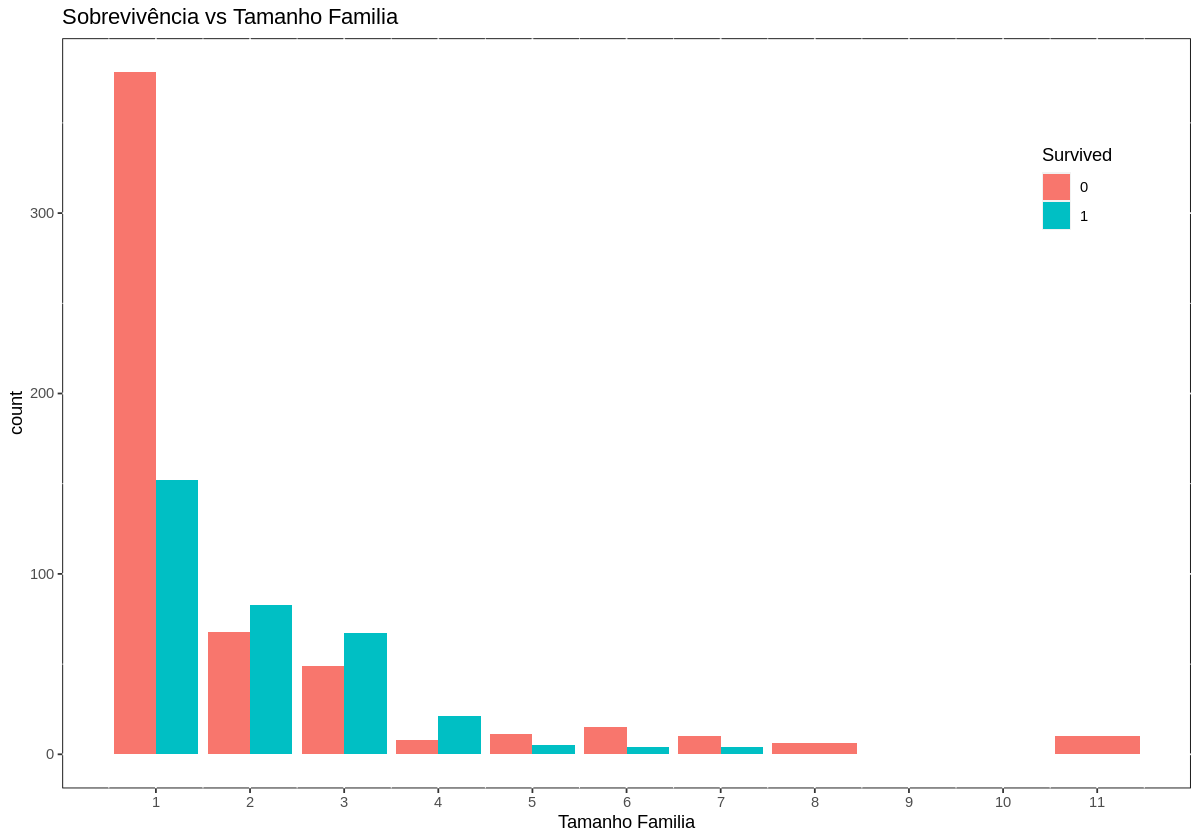

In [ ]:
#sobrevivência em função do tamanho da família
x <- titanic_avaliar1[1:891,]
ggplot(x, aes(x = tam_familia, fill = factor(Survived))) + 
  geom_bar(stat = 'count', position = "dodge") + 
  scale_x_continuous(breaks = c(1:11)) + 
  labs(x = "Tamanho Familia", fill = "Survived", 
       title = "Sobrevivência vs Tamanho Familia") +
  theme(legend.position = c(0.9, 0.8), panel.background = NULL)

As famílias com 2, 3 ou 4 integrantes tinham mais possibilidade de sobrevivência. Poderia reduzir a variável tam_familia em 3 níveis de acordo com a quantidae de pessoas por família ("Unico", "Pequena", "Grande").

In [ ]:
#Verificando Dados Faltantes
sapply(titanic_avaliar1,function(df){100*sum(is.na(df==TRUE)/length(df))})

Survived      Pclass         Sex         Age       SibSp       Parch 
          0           0           0           0           0           0 
       Fare    Embarked PassengerId tam_familia 
          0           0           0           0

In [ ]:
titanic_avaliar1$tam_familia_tipo[titanic_avaliar1$tam_familia == 1] <- "Unico"
titanic_avaliar1$tam_familia_tipo[titanic_avaliar1$tam_familia <= 4 & titanic_avaliar1$tam_familia > 1] <- "Pequena"
titanic_avaliar1$tam_familia_tipo[titanic_avaliar1$tam_familia > 4] <- "Grande"
titanic_avaliar1$tam_familia_tipo <- factor(titanic_avaliar1$tam_familia_tipo, levels = c("Unico", "Pequena", "Grande"))

In [ ]:
titanic_avaliar2 <- titanic_avaliar1[1:891,]
table(titanic_avaliar2$Survived, titanic_avaliar2$tam_familia_tipo)

   
    Unico Pequena Grande
  0   378     125     52
  1   152     171     13

In [ ]:
str(titanic_avaliar1)

'data.frame':	1309 obs. of  11 variables:
 $ Survived        : num  0 1 0 1 0 0 1 0 0 1 ...
 $ Pclass          : int  3 1 2 1 3 3 1 3 3 2 ...
 $ Sex             : chr  "male" "female" "male" "female" ...
 $ Age             : num  29 37 36 37 30 ...
 $ SibSp           : int  0 1 0 0 0 1 1 0 0 0 ...
 $ Parch           : int  0 0 0 1 0 0 1 0 0 0 ...
 $ Fare            : num  7.85 90 13 55 8.05 ...
 $ Embarked        : chr  "S" "Q" "S" "S" ...
 $ PassengerId     : int  2 3 4 5 6 10 11 12 13 15 ...
 $ tam_familia     : num  1 2 1 2 1 2 3 1 1 1 ...
 $ tam_familia_tipo: Factor w/ 3 levels "Unico","Pequena",..: 1 2 1 2 1 2 2 1 1 1 ...


In [ ]:
#Data frame com as variáveis solicitdas
titanic_avaliar1 <- titanic_avaliar[,c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','PassengerId')]


In [ ]:
str(titanic_avaliar1)

'data.frame':	1309 obs. of  9 variables:
 $ Survived   : num  0 1 0 1 0 0 1 0 0 1 ...
 $ Pclass     : int  3 1 2 1 3 3 1 3 3 2 ...
 $ Sex        : chr  "male" "female" "male" "female" ...
 $ Age        : num  29 37 36 37 30 ...
 $ SibSp      : int  0 1 0 0 0 1 1 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 0 1 0 0 0 ...
 $ Fare       : num  7.85 90 13 55 8.05 ...
 $ Embarked   : chr  "S" "Q" "S" "S" ...
 $ PassengerId: int  2 3 4 5 6 10 11 12 13 15 ...


Análises do modelo, verificando a significância estatística das variáveis (e seus parâmetros ajustados), gráficos diagnósticos, etc.

#Modelo de regressão logística simples

In [ ]:
train <- titanic_avaliar1[1:891,]
test <- titanic_avaliar1[892:1309,]

In [ ]:
model <- glm(Survived ~.,family=binomial(link='logit'),data=titanic_avaliar1)

In [ ]:
summary(model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = titanic_avaliar1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8359  -0.6562  -0.4350   0.7141   2.4482  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.5160976  0.4154137   6.057 1.39e-09 ***
Pclass      -0.6682844  0.1133713  -5.895 3.75e-09 ***
Sexmale     -1.7828757  0.1489651 -11.968  < 2e-16 ***
Age         -0.0252676  0.0059856  -4.221 2.43e-05 ***
SibSp       -0.1642180  0.0844669  -1.944   0.0519 .  
Parch        0.0872860  0.0850833   1.026   0.3049    
Fare         0.0006347  0.0015550   0.408   0.6831    
EmbarkedQ   -0.1760343  0.2958966  -0.595   0.5519    
EmbarkedS   -0.3159414  0.1783162  -1.772   0.0764 .  
PassengerId -0.0002271  0.0001892  -1.200   0.2302    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1491.1  on 1308  degr

In [ ]:
nulo <- glm(Survived ~ 1, family = binomial(link = "logit"), data = titanic_avaliar1)
completo <- glm(Survived ~ ., family = binomial(link = "logit"), data = titanic_avaliar1)
titanic_step <- step(completo, data = titanic_avaliar1, direction = "backward", trace = FALSE)
summary(titanic_step)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = binomial(link = "logit"), 
    data = titanic_avaliar1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8150  -0.6667  -0.4379   0.7615   2.3957  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.355461   0.335070   7.030 2.07e-12 ***
Pclass      -0.725116   0.091701  -7.907 2.63e-15 ***
Sexmale     -1.832450   0.144747 -12.660  < 2e-16 ***
Age         -0.025754   0.005975  -4.310 1.63e-05 ***
SibSp       -0.145669   0.078901  -1.846   0.0649 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1491.1  on 1308  degrees of freedom
Residual deviance: 1217.8  on 1304  degrees of freedom
AIC: 1227.8

Number of Fisher Scoring iterations: 4


In [ ]:
titanic_glm <- glm(Survived ~ Sex, data = train, family = 'binomial')
summary(titanic_glm)


Call:
glm(formula = Survived ~ Sex, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5959  -0.6430  -0.6430   0.8103   1.8320  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.9451     0.1249   7.566 3.85e-14 ***
Sexmale      -2.4164     0.1646 -14.680  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1180.80  on 890  degrees of freedom
Residual deviance:  928.79  on 889  degrees of freedom
AIC: 932.79

Number of Fisher Scoring iterations: 4


In [ ]:
# Teste  acuracia
predict_sex_survived <- predict(titanic_glm,newdata = test,type = 'response') 
#if para arredondar para cima ou para baixo a resposta de Survived
predict_sex_survived <- ifelse(predict_sex_survived>0.5,1,0)
error_1 <- mean(predict_sex_survived!=test$Survived)
accuracy_1 <- 1-error_1
accuracy_1

[1] 0.645933

O valor previsto de sobrevivência usando o conjunto de dados de teste é comparado com o status real de sobrevivência de cada passageiro, dando ao modelo uma precisão de 64%. A maioria dos passageiros sobreviventes seria do sexo feminino, e a maioria dos passageiros que não sobreviveram seria do sexo masculino.

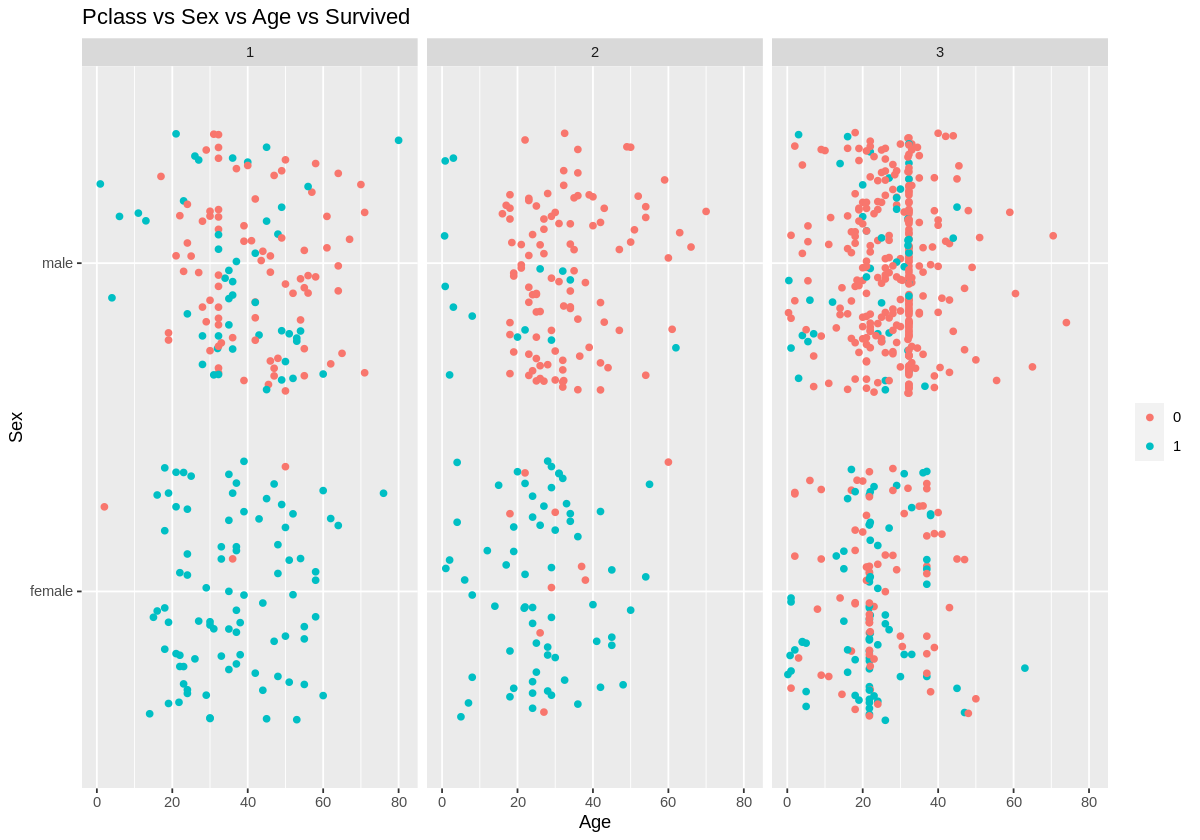

In [ ]:
#Pclass vs Sex vs Age vs Survived
ggplot(train[1:891,], aes(x = Age, y = Sex)) + 
  geom_jitter(aes(colour = factor(Survived))) +
  theme(legend.title = element_blank())+
  facet_wrap(~Pclass) + 
  labs(x = "Age", y = "Sex", title = "Pclass vs Sex vs Age vs Survived")+
  scale_fill_discrete(name = "Survived") + 
  scale_x_continuous(name="Age",limits=c(0, 81))

#Modelo de regressão logística
Com a precisão de 64%, poderiamos melhorá-lo incluindo mais atributos. Para determinar quais atributos são um preditor significativo para Survived.

A seguir 2 modelos, um com todas as variáveis ​​e outro com apenas os preditores significativos selecionados, usando regressão stepAIC com AIC como pontuação. 

In [ ]:
nulo <- glm(Survived~1,data=train,family = binomial)

titanic_logistic_completo <- glm(Survived~., data=train, family = binomial)
summary(titanic_logistic_completo)


Call:
glm(formula = Survived ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5782  -0.6493  -0.4108   0.6601   2.4740  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.0533655  0.5677463   8.901  < 2e-16 ***
Pclass      -0.9866439  0.1419551  -6.950 3.64e-12 ***
Sexmale     -2.6522611  0.1990489 -13.325  < 2e-16 ***
Age         -0.0332128  0.0072515  -4.580 4.65e-06 ***
SibSp       -0.2489768  0.1035739  -2.404   0.0162 *  
Parch       -0.0813172  0.1020241  -0.797   0.4254    
Fare         0.0025985  0.0022627   1.148   0.2508    
EmbarkedQ   -0.5120945  0.3676497  -1.393   0.1637    
EmbarkedS   -0.4579395  0.2256535  -2.029   0.0424 *  
PassengerId -0.0005012  0.0002372  -2.113   0.0346 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1180.80  on 890  degrees of freedom
Residual deviance

In [ ]:
install.packages("MASS")
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Atualizar o modelo como consequência da análise realizada no item anterior.

In [ ]:
# Modelo 2 - stepAIC
titanic_logistic_stepAIC <- titanic_logistic_completo %>% stepAIC(direction='both',trace = FALSE)
summary(titanic_logistic_stepAIC)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked + 
    PassengerId, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5396  -0.6524  -0.4063   0.6685   2.4938  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.3167090  0.5122989  10.378  < 2e-16 ***
Pclass      -1.0722426  0.1236387  -8.672  < 2e-16 ***
Sexmale     -2.6313089  0.1932523 -13.616  < 2e-16 ***
Age         -0.0333566  0.0072342  -4.611 4.01e-06 ***
SibSp       -0.2439491  0.0984567  -2.478   0.0132 *  
EmbarkedQ   -0.5133070  0.3636628  -1.411   0.1581    
EmbarkedS   -0.5137296  0.2206044  -2.329   0.0199 *  
PassengerId -0.0004978  0.0002368  -2.103   0.0355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1180.80  on 890  degrees of freedom
Residual deviance:  807.81  on 883  degrees of freedom
AIC: 823.81

Numb

In [ ]:
#Compara AIC para os modelos
AIC(titanic_logistic_completo,titanic_logistic_stepAIC)

,df,AIC
,<dbl>,<dbl>
titanic_logistic_completo,10,826.0884
titanic_logistic_stepAIC,8,823.8140


Usando o modelo 2, podemos calcular a probabilidade de sobrevivência e precisão do modelo. Obtém-se uma precisão de 65%.

In [ ]:
# acuracia usando dataset test 
predict_2 <- predict(titanic_logistic_stepAIC,newdata = test,type = 'response') 
predict_2 <- ifelse(predict_2>0.5,1,0)
error_2 <- mean(predict_2!=test$Survived)
accuracy_2 <- 1-error_2
accuracy_2



[1] 0.65311

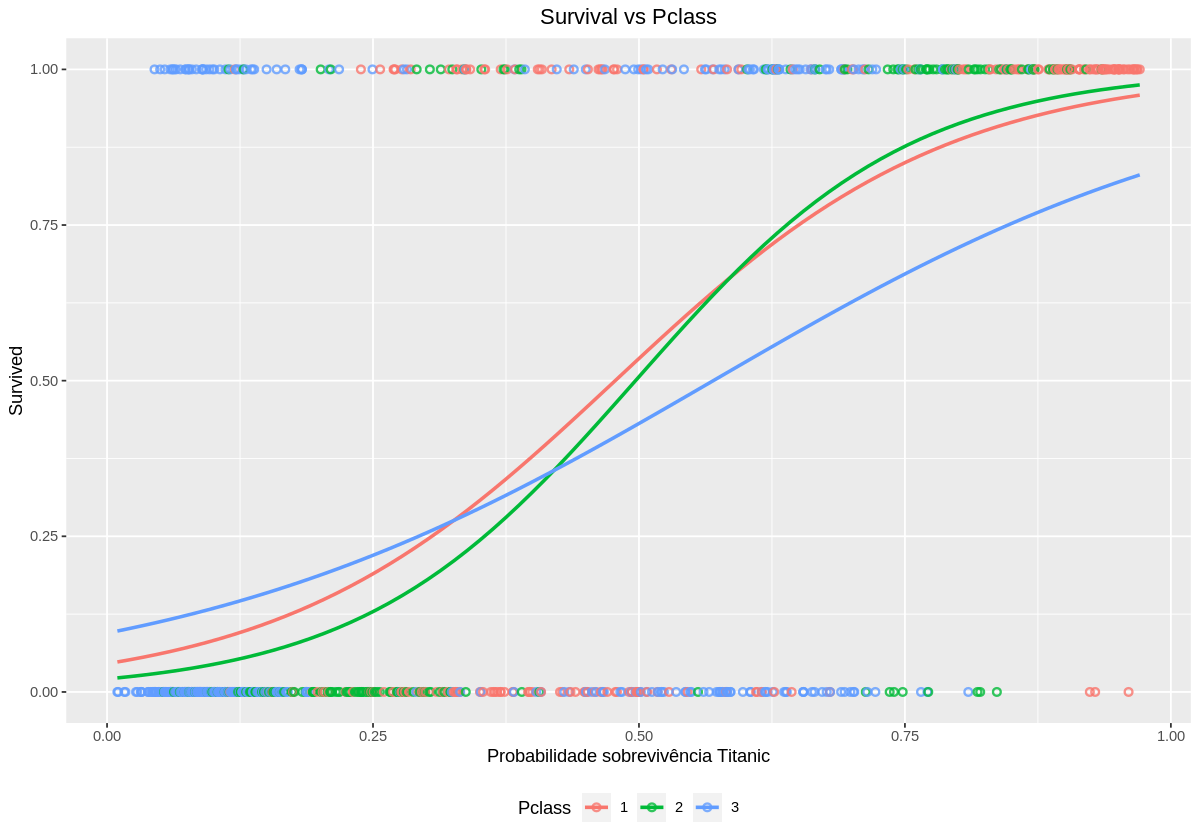

In [ ]:
train$Pclass <- as.factor(train$Pclass)
train$Sex <- as.factor(train$Sex)
# gráfico de regressão logística Survived vs Pclass - Predição vs Atual 
predic <- data.frame(probability.of.survival = titanic_logistic_stepAIC$fitted.value,Survived=train$Survived,Pclass=train$Pclass)
predic <- predic[order(predic$probability.of.survival,decreasing = FALSE),]
ggplot(data=predic,aes(x=probability.of.survival,y=Survived,col=Pclass))+
  geom_point(alpha=0.8,shape=1,stroke=1)+
  xlab('Probabilidade sobrevivência Titanic')+
  ylab('Survived')+
  stat_smooth(formula = y ~ x, method="glm", method.args=list(family="binomial"), se=FALSE,fullrange = TRUE)+
  theme(legend.position = 'bottom',plot.title = element_text(hjust = 0.5))+
  ggtitle('Survival vs Pclass')

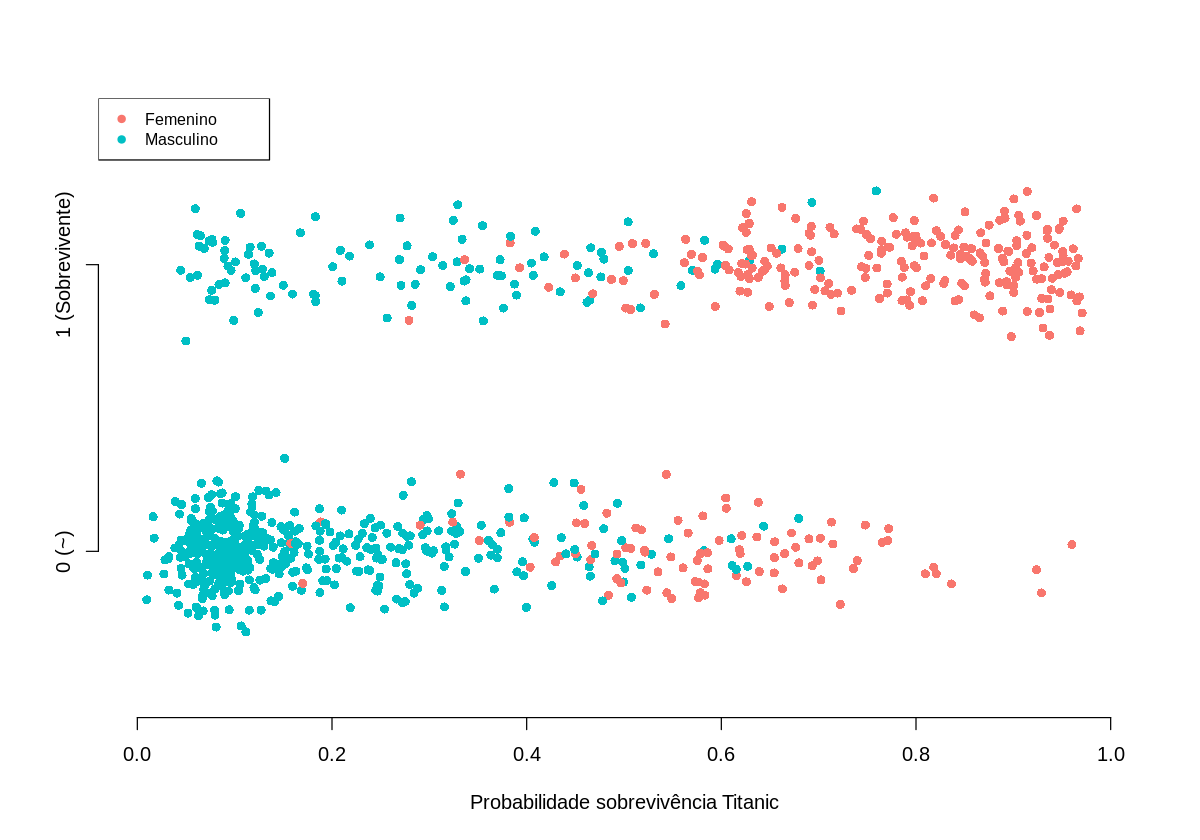

In [ ]:
attach(train)
jitter = rnorm(nrow(train), sd = 0.1)
plot(titanic_logistic_stepAIC$fitted.values, train$Survived+ jitter,xlim = 0:1, ylim = c(-0.5, 1.5), axes =
       FALSE,
     xlab = "Probabilidade sobrevivência Titanic", ylab = "", col = c('#F8766D','#00BFC4')[train$Sex], pch = 16)
axis(1)
axis(2, at = c(0, 1), labels = c("0 (~)", "1 (Sobrevivente)"))
legend("topleft",pch = 19,col=c('#F8766D','#00BFC4'),c("Femenino", "Masculino"),cex = 0.8,bty="o")

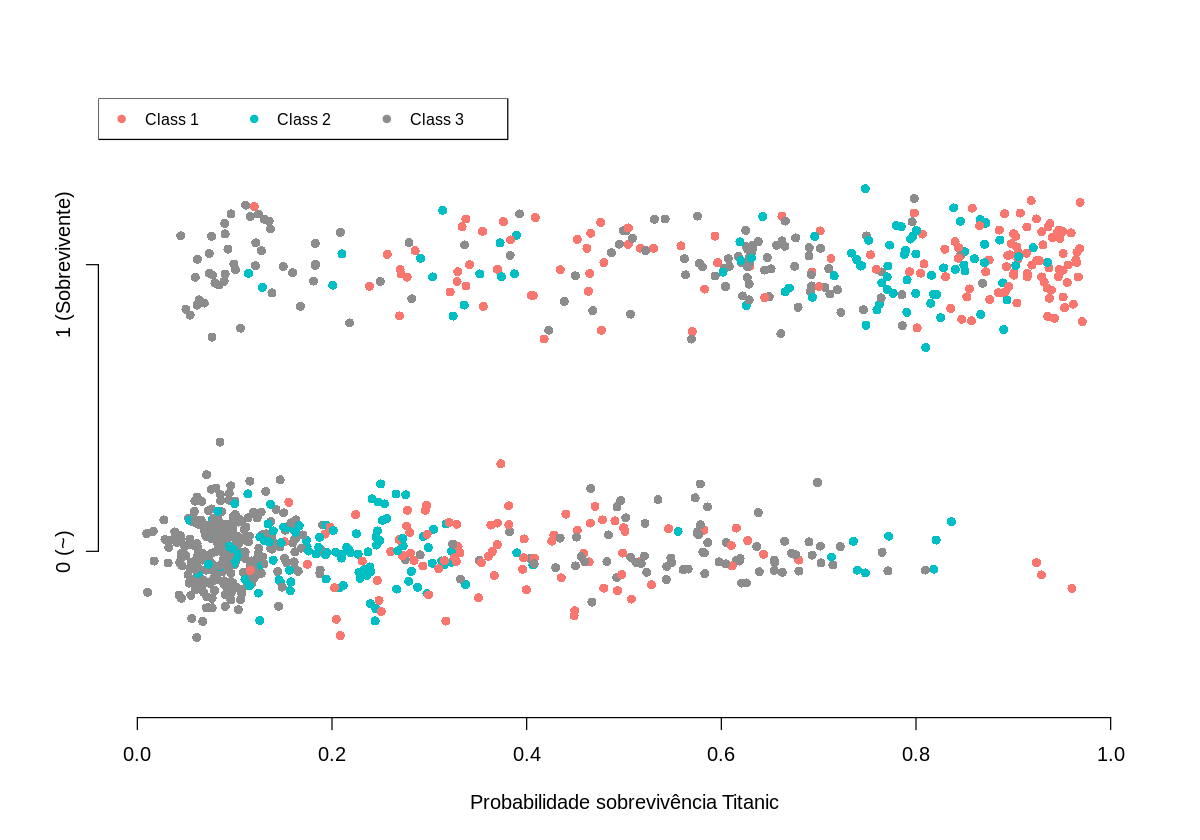

In [ ]:
# glm vs Pclass
set.seed(1)
jitter = rnorm(nrow(train), sd = 0.10)
plot(titanic_logistic_stepAIC$fitted.values, train$Survived+ jitter,xlim = 0:1, ylim = c(-0.5, 1.5), axes =
       FALSE,
     xlab = "Probabilidade sobrevivência Titanic", ylab = "", col = c('#F8766D','#00BFC4','#8c8c8c')[train$Pclass], pch = 16)
axis(1)
axis(2, at = c(0, 1), labels = c("0 (~)", "1 (Sobrevivente)"))
legend("topleft",bg='transparent',pch = 19,col=c('#F8766D','#00BFC4','#8c8c8c'),c('Class 1','Class 2','Class 3'),horiz = T,cex = 0.8,bty="o")

Fazer as previsões da variável Survived na base de dados de teste utilizando o modelo refinado, e preparar um arquivo CSV para submissão que contenha apenas duas colunas: PassengerId, Survived.

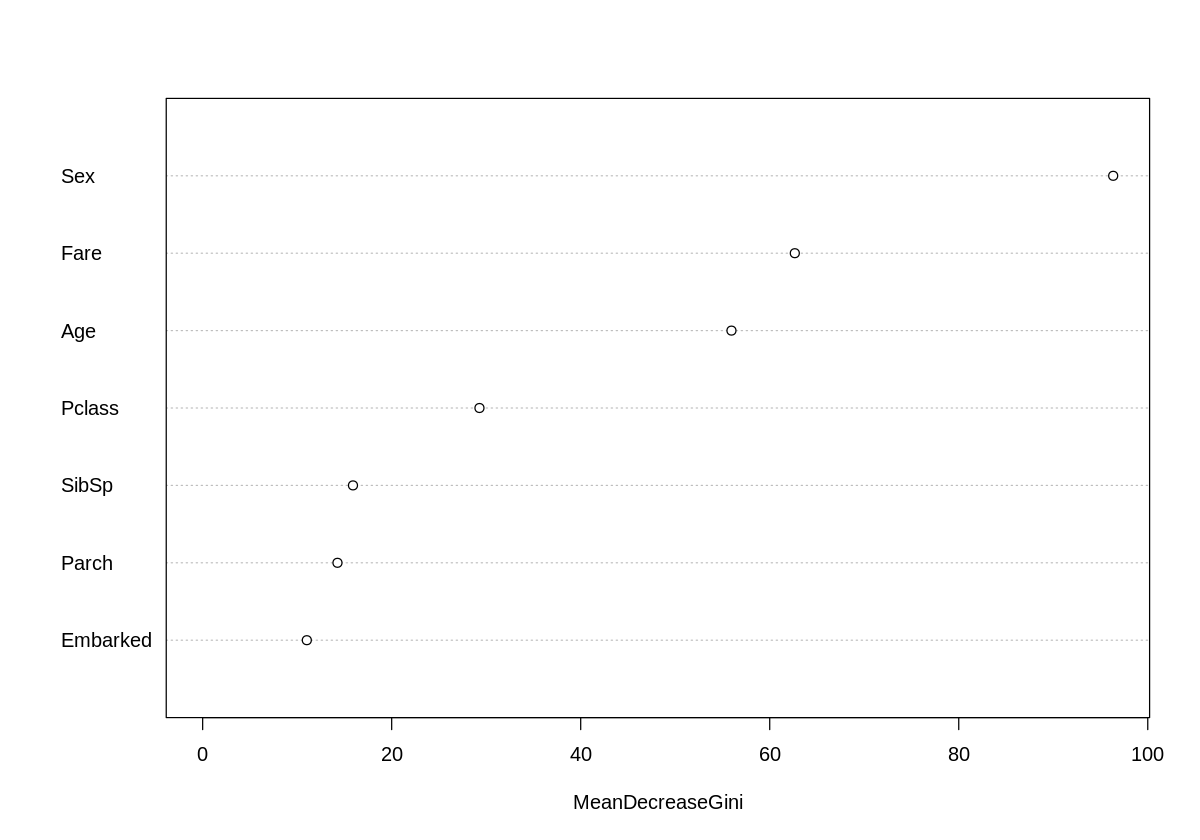

In [ ]:
library('randomForest')
set.seed(123)
rf_model <- randomForest(factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = train)
varImpPlot(rf_model, main = "")

In [ ]:
print(rf_model)


Call:
 randomForest(formula = factor(Survived) ~ Pclass + Sex + Age +      SibSp + Parch + Fare + Embarked, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 20.31%
Confusion matrix:
    0   1 class.error
0 492  63   0.1135135
1 118 218   0.3511905


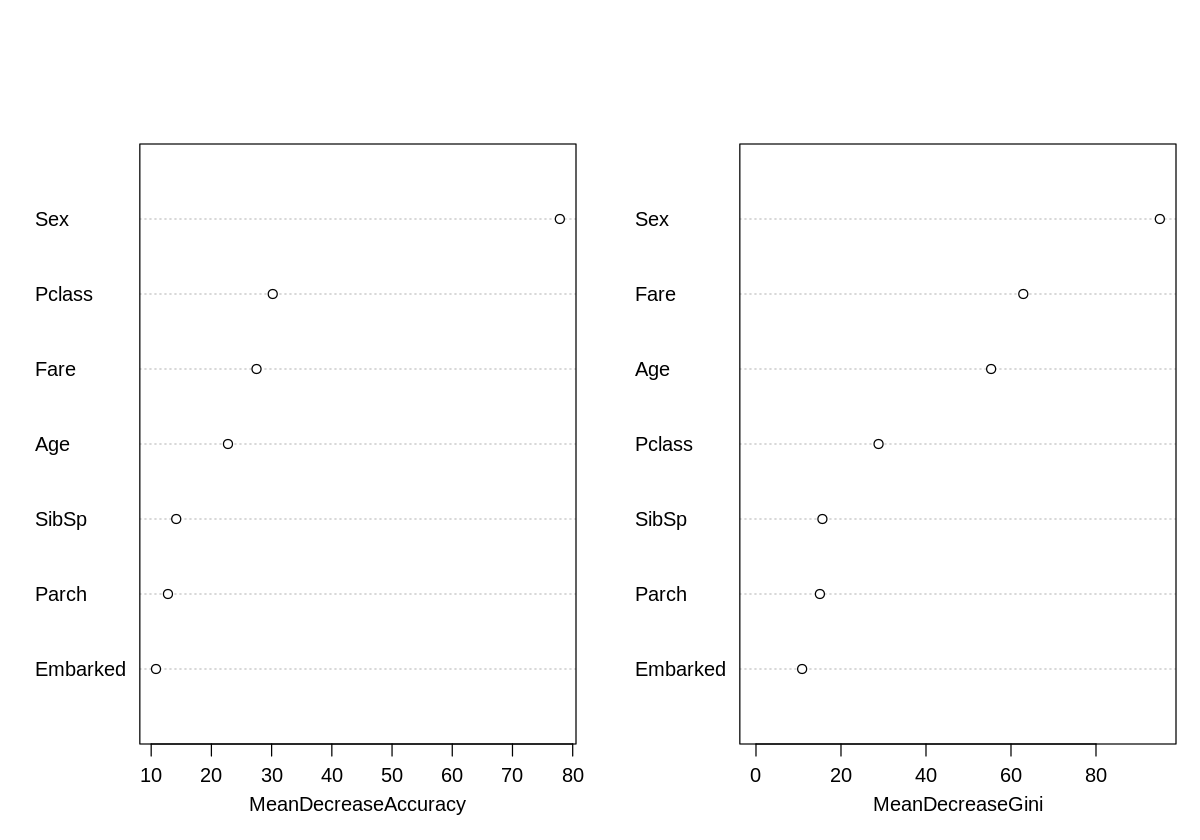

In [ ]:
train_RF <- randomForest(factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, 
     data = train, importance = TRUE, ntree = 500)
# agora examinamos a importancia de cada variavel na predicao do grupo
varImpPlot(train_RF, main = "")


In [ ]:
predict_2 <- predict(titanic_logistic_stepAIC,newdata = test,type = 'response') 
predict_2 <- ifelse(predict_2>0.5,1,0)
error_2 <- mean(predict_2!=test$Survived)
accuracy_2 <- 1-error_2
accuracy_2

[1] 0.65311

In [ ]:
predicao <- predict(titanic_logistic_stepAIC, test)
titanic_sol <- data.frame(Survived = predicao, PassengerID = test$PassengerId, Pclass = test$Pclass , Sex= test$Sex , Age= test$Age , SibSp= test$SibSp , Parch= test$Parch , Fare= test$Fare, Embarked= test$Embarked)

# .csv
write.csv(titanic_sol, file = 'stepAIC_model_sol.csv', row.names = F)
